In [14]:
import numpy as np
import torch
from torchvision.datasets import mnist
from torch import nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
def data_tf(x):
    x = np.array(x, dtype='float32')/255
    x = (x-0.5)/0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x


In [16]:
train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True)
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)
criterion = nn.CrossEntropyLoss()

In [17]:
# 自定义SGD
def sgd_update(parameters, lr):
    for param in parameters:
        param.data = param.data - lr*param.grad.data


In [18]:
train_data = DataLoader(train_set, batch_size=1, shuffle=True)


In [19]:
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

losses1 = []
idx = 0

start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1e-2)
        train_loss += loss.item()
        if idx % 30 == 0:
            losses1.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.
          format(e, train_loss/len(train_data)))
end = time.time()

print('使用时间: {:.5f} s'.format(end - start))


epoch: 0, Train Loss: 0.349696
epoch: 1, Train Loss: 0.213365
epoch: 2, Train Loss: 0.182699
epoch: 3, Train Loss: 0.161640
epoch: 4, Train Loss: 0.146047
使用时间: 509.77826 s


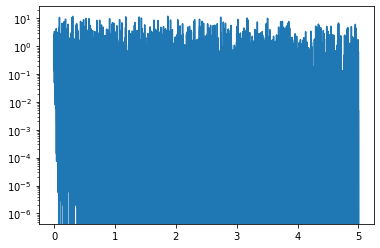

In [20]:
x_axis = np.linspace(0,5,len(losses1), endpoint=True)
plt.semilogy(x_axis, losses1, label='batch_size=1')


epoch: 0, Train Loss: 0.752461
epoch: 1, Train Loss: 0.366954
epoch: 2, Train Loss: 0.321826
epoch: 3, Train Loss: 0.296091
epoch: 4, Train Loss: 0.275162
使用时间: 31.84131 s


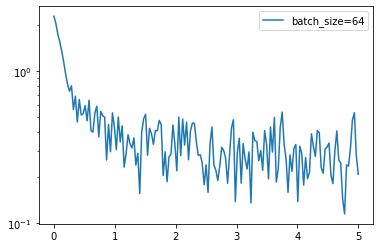

In [21]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200,10),
)

losses2 = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1e-2)
        train_loss += loss.item()
        if idx % 30 == 0:
            losses2.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()
print('使用时间: {:.5f} s'.format(end-start))

x_axis = np.linspace(0,5,len(losses2), endpoint=True)
plt.semilogy(x_axis, losses2, label='batch_size=64')
plt.legend(loc='best')


epoch: 0, Train Loss: 2.722102
epoch: 1, Train Loss: 2.311838
epoch: 2, Train Loss: 2.308984
epoch: 3, Train Loss: 2.307689
epoch: 4, Train Loss: 2.307205
使用时间: 32.52754 s


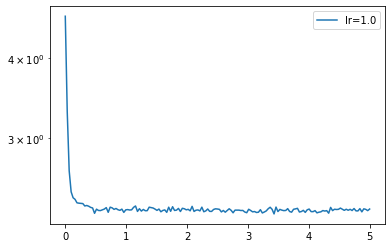

In [23]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
)
losses3 = []
idx = 0
start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1)
        train_loss += loss.item()
        if idx % 30 == 0:
            losses3.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()
print('使用时间: {:.5f} s'.format(end-start))

x_axis = np.linspace(0,5,len(losses3), endpoint=True)
plt.semilogy(x_axis, losses3, label='lr=1.0')
plt.legend(loc='best')


epoch: 0, Train Loss: 0.803969
epoch: 1, Train Loss: 0.367460
epoch: 2, Train Loss: 0.321995
epoch: 3, Train Loss: 0.293988
epoch: 4, Train Loss: 0.272088
使用时间: 29.20177 s


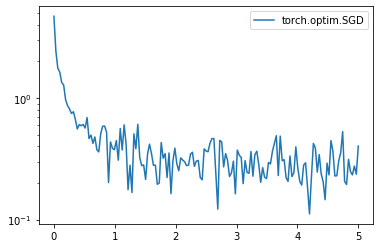

In [24]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
)
losses4 = []
idx = 0
optimizer = torch.optim.SGD(net.parameters(), 0.01)

start = time.time()
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        net.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if idx % 30 == 0:
            losses4.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'.format(e, train_loss/len(train_data)))
end = time.time()
print('使用时间: {:.5f} s'.format(end-start))

x_axis = np.linspace(0,5,len(losses4), endpoint=True)
plt.semilogy(x_axis, losses4, label='torch.optim.SGD')
plt.legend(loc='best')

